In [1]:
'''
의사결정트리: 오버피팅 가능성이 높다. -> 가지치기를 잘 알아야해 -> 부족한 알고리즘
랜덤포레스트: 의사결정 트리의 한계를 극복하기 위한 알고리즘

의사결정트리생성? 배깅이용!!
ex) 학습데이터 1000개(행), 25개(속성) -> 임의로 100개의 데이터 선택(31번 반복) -> 트리(31개) 구성
-> 트리 작성 시 사용될 Features 제한 -> 나무에 대한 다양성
- 그럼 속성 몇 개? => 전체 속성 갯수(25)의 제곱근이 가장 좋다!! -> 5개의 속성 활용

*RandomForest 중요 옵션*
RandomForestClassifier(
- <트리 갯수>n_estimators=100, / 크게 할수록 좋음 (시간은 오래걸림)
- min_samples_split int or float, default=2 / 노드를 분할하기위한 최소한의 데이터 수 (과적합 제어)
                                            작게 설정할수록 분할 노드가 많아지므로 과적합이 증가할 수 있음.
(과적합: 모델을 훈련데이터로 평가했을 때 성능 >>> 실제 데이터로 평가했을 때 성능)

- <트리 깊이>max_depth = None/ 완전하게 클래스 값이 결정될때까지 분할 
                              또는 데이터 갯수가 min_samples_split보다 작아질 때까지 분할

- min_samples_leaf / 리프노드(터미널노드)가 되기 위해 필요로하는 최소한의 샘플 데이터 갯수
                     일반적으로 작게 설정함.
<samples> -> 데이터로 이해.
==>> 최적의 RandomForest Parameter를 설정하는 게 매우 중요! 
과거(현재)는 수동으로 튜닝했음.(매번 바꿔가면서) # 너무 괴롭다...
=> GridSearchCV라는 클래스를 사용해서 RandomForest Hyper Parameter 튜닝 가능!
myparam = { 
n_estimators:[5,10,30,50,100,200]
min_samples_split:[3,5,7,9,11]
max_depth:[3,5,7,9,11,13]
n_jobs = -1 # 모든 CPU 모두 돌림
}
GridSearchCV(param_grid = myparam)



'''

'\n의사결정트리: 오버피팅 가능성이 높다. -> 가지치기를 잘 알아야해 -> 부족한 알고리즘\n랜덤포레스트: 의사결정 트리의 한계를 극복하기 위한 알고리즘\n\n의사결정트리생성? 배깅이용!!\nex) 학습데이터 1000개(행), 25개(속성) -> 임의로 100개의 데이터 선택(31번 반복) -> 트리(31개) 구성\n-> 트리 작성 시 사용될 Features 제한 -> 나무에 대한 다양성\n- 그럼 속성 몇 개? => 전체 속성 갯수(25)의 제곱근이 가장 좋다!! -> 5개의 속성 활용\n\n*RandomForest 중요 옵션*\nRandomForestClassifier(\n- <트리 갯수>n_estimators=100, / 크게 할수록 좋음 (시간은 오래걸림)\n- min_samples_split int or float, default=2 / 노드를 분할하기위한 최소한의 데이터 수 (과적합 제어)\n                                            작게 설정할수록 분할 노드가 많아지므로 과적합이 증가할 수 있음.\n(과적합: 모델을 훈련데이터로 평가했을 때 성능 >>> 실제 데이터로 평가했을 때 성능)\n\n- <트리 깊이>max_depth = None/ 완전하게 클래스 값이 결정될때까지 분할 \n                              또는 데이터 갯수가 min_samples_split보다 작아질 때까지 분할\n\n- min_samples_leaf / 리프노드(터미널노드)가 되기 위해 필요로하는 최소한의 샘플 데이터 갯수\n                     일반적으로 작게 설정함.\n<samples> -> 데이터로 이해.\n==>> 최적의 RandomForest Parameter를 설정하는 게 매우 중요! \n과거(현재)는 수동으로 튜닝했음.(매번 바꿔가면서) # 너무 괴롭다...\n=> GridSearchCV라는 클래스를 사용해서 RandomForest Hyper Parameter 튜닝 가능!\nmypar

- RMSLE
- 예측값: P
- 답: a
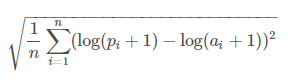


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv',parse_dates = ['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [4]:
test = pd.read_csv('test.csv',parse_dates = ['datetime'])
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [5]:
train['datetime']

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [6]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

In [7]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

In [8]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0,3


In [9]:
test.shape

(6493, 16)

In [10]:
train.shape

(10886, 19)

In [11]:
# train.loc[train['windspeed']==0,'windspeed'] = train['windspeed'].mean()  -> 좋은 방법이 아냐!
# 랜덤포레스트를 이용한 풍속 0값을 대체
# 풍속 0, not 0으로 분류
trainWind0 = train.loc[train.windspeed == 0]
trainWindNot0 = train.loc[train.windspeed != 0]
print(trainWind0.info())
print(trainWindNot0.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 10862
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    1313 non-null   datetime64[ns]
 1   season      1313 non-null   int64         
 2   holiday     1313 non-null   int64         
 3   workingday  1313 non-null   int64         
 4   weather     1313 non-null   int64         
 5   temp        1313 non-null   float64       
 6   atemp       1313 non-null   float64       
 7   humidity    1313 non-null   int64         
 8   windspeed   1313 non-null   float64       
 9   casual      1313 non-null   int64         
 10  registered  1313 non-null   int64         
 11  count       1313 non-null   int64         
 12  year        1313 non-null   int64         
 13  month       1313 non-null   int64         
 14  day         1313 non-null   int64         
 15  hour        1313 non-null   int64         
 16  minute      1313 non-nu

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

In [14]:
# 입력데이터 -> 랜덤포레스트 모델 -> 출력데이터(windspeed)
# 풍속을 예측하는데 사용될 변수(입력)를 선택해야함!
def predictWindSpeed(data):  # data의 windspeed값이 0인 애들을 랜덤포레스트 예측 값으로 대체.
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # wind 예측 변수
    wCol = ['season','weather','temp','atemp','humidity','year','month']
    
    # 회귀모델도 가능!
    # wind 예측함수 = w1*season + w2*weather + ... + w7*month + b
    
    # 출력 데이터 타입이 str이어야 하기에 타입을 str로 바꿈.
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # RandomForest 분류기
    rfModelWind = RandomForestClassifier()
    
    # 모델링(학습데이터)
    # wind not 0 데이터로 학습시켜 모델을 만든 후, wind 0 데이터를 모델에 입력하면 예측된 풍속 출력됨!
    rfModelWind.fit(dataWindNot0[wCol],dataWindNot0['windspeed'] )
    
    # 모델(rfModelWind)을 이용하여 풍속이 0인 데이터에 대한 풍속 예측!
    wind0Values = rfModelWind.predict(dataWind0[wCol])
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    # 풍속 0을 예측된 값으로 변경!
    predictWind0['windspeed'] = wind0Values
    
    # 풍속이 0이 아닌 데이터 프레임에 예측된 값이 저장된 데이터 프레임을 합침.
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed']=data['windspeed'].astype('float')
        
    data.reset_index(inplace = True)    
    data.drop('index',inplace = True, axis = 1)
    
    return data

In [15]:
train = predictWindSpeed(train)
# test = predictWindSpeed(test)

C:\Users\joww0\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\joww0\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  int64         
 16  minute      10886 non-

In [17]:
train.windspeed.describe()

count    10886.000000
mean        14.007961
std          7.050134
min          6.003200
25%          8.998100
50%         12.998000
75%         19.001200
max         56.996900
Name: windspeed, dtype: float64

In [18]:
# 연속형 변수 -> 범주형 변수 변환!

In [19]:
# RandomForestClassifier , RandomForestRegressor

In [20]:
category_fn = ['season','holiday','workingday','weather','year','month','hour','dayofweek']

In [21]:
for v in category_fn:
    train[v] = train[v].astype('category')
    test[v] = train[v].astype('category')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  category      
 3   workingday  10886 non-null  category      
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  category      
 13  month       10886 non-null  category      
 14  day         10886 non-null  int64         
 15  hour        10886 non-null  category      
 16  minute      10886 non-

In [23]:
from sklearn.metrics import make_scorer

In [24]:
def RMSLE(pv, av): # 외부로부터 예측값과 실제값을 전달받아 점수로 환산해줄거야!
    # 먼저 넘파이 배열로 변환
    pv = np.array(pv)
    av = np.array(av)
    
    # 예측값과 실제값에 1을 더하고 로그를 씌우기
    log_predict = np.log(pv+1)
    log_actual = np.log(av+1)
    
    res = log_predict - log_actual
    
    #제곱
    res = np.square(res)
    
    # 평균
    mean_res = res.mean()
    
    # 루트
    score = np.sqrt(mean_res)
    
    return score

In [25]:
rmsle_scorer = make_scorer(RMSLE)

- 교차 검증: 모델의 일반화 성능을 측정하기 위해 데이터를 여러겹(fold)으로 나누고, <br>
Train, Test 용으로 나뉘어진 폴드를 다양하게 적용하여 모델을 학습 및 평가.(편협적인 모델이 만들어지는 것을 방지 및 일반적인 모델 만들기를 원하니까!) 보통 10겹으로 나눔!
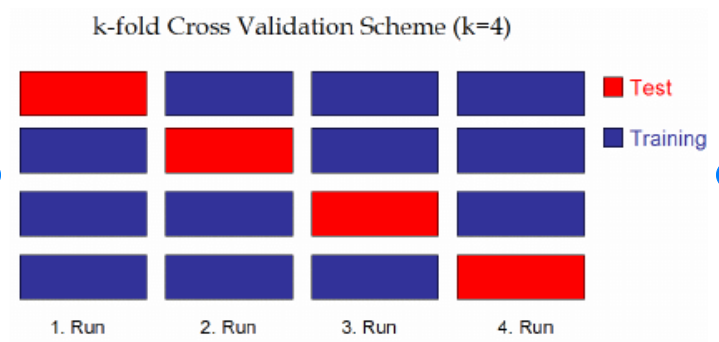<br>
ex) data 100건을 4겹(fold)(겹 당 25건) / 1번째 fold(test), 2~4번째 fold(train) ->2,3,4 돌아가면서 test 나머지는 train <br>
따라서 4개의 정확도를 출력함! -> 정확도의 평균(최종 모델 정확도)

In [26]:
# k-fold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [27]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42) # shuffle: 초기에 데이터 섞을래?

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(n_estimators=51,
                              max_depth=7,
                              min_samples_split=8,
                     n_jobs=5,
                     random_state=42)

In [30]:
# 데이터 분리!
fn = ['season','holiday','workingday','weather','year','hour','dayofweek','temp',
              'atemp','humidity','windspeed',]

In [31]:
len(fn)

11

In [32]:
xTrain = train[fn]
xTrain.shape

(10886, 11)

In [33]:
xTest = test[fn]
xTest.shape

(6493, 11)

In [34]:
yTrain = train['count']
yTrain.shape

(10886,)

In [35]:
model.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=7, min_samples_split=8, n_estimators=51,
                      n_jobs=5, random_state=42)

In [36]:
pred = model.predict(xTest)

In [37]:
pred.shape
model.score(xTrain,yTrain)

0.825781443366785

In [38]:
score = cross_val_score(model, xTrain, yTrain, cv = kfold, scoring = rmsle_scorer)

In [39]:
score.mean()

0.4840011536789273

In [40]:
xTrain이 model에 들어가면 예측 결과가 나옴(pv, yhat) -> RMSLE 함수에 전달
yTrain(av) -> RMSLE 함수에 전달

SyntaxError: invalid syntax (<ipython-input-40-80ba70d264b7>, line 1)

In [ ]:
bikeSubmit = pd.read_csv('sampleSubmission.csv')
bikeSubmit['count'] = pred

In [ ]:
bikeSubmit

In [ ]:
bikeSubmit.to_csv('bikeSubmit.csv',index=False)

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# myparam = { 
# 'n_estimators':[51,101,151],
# 'min_samples_split':[4,6,8,10],
# 'max_depth':[3,5,7,9,]}
# rfModel = RandomForestClassifier(random_state=924, n_jobs = 2) 


In [ ]:
# gridCV = GridSearchCV(rfModel, param_grid = myparam, cv = 5, n_jobs = 2)
# gridCV.fit(xTrain,yTrain)
# print(gridCV.best_params_)
# gridCV.best_score_
# {'max_depth': 7, 'min_samples_split': 8, 'n_estimators': 51}
# 0.022138409188979198